<a href="https://colab.research.google.com/github/ab3131/NBAInjuryPredictor/blob/main/NBAInjuryPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Statements**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# **Data Cleaning**

In [2]:
player_stats = pd.read_csv('player_stats.csv')
injuries_original = pd.read_csv('NBA Player Injury Stats(1951 - 2023).csv')

In [3]:
player_stats.columns[0]


'Unnamed: 0'

In [4]:
injuries_original.columns[0]

'Unnamed: 0'

In [5]:
player_stats = player_stats.drop(columns = player_stats.columns[0], axis=1)

In [6]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0      Randy Livingston               HOU  22.0         193.04      94.800728   
1      Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2          George Lynch               VAN  26.0         203.20     103.418976   
3        George McCloud               LAL  30.0         203.20     102.058200   
4          George Zidek               DEN  23.0         213.36     119.748288   
...                 ...               ...   ...            ...            ...   
12839       Joel Embiid               PHI  29.0         213.36     127.005760   
12840   John Butler Jr.               POR  20.0         213.36      86.182480   
12841      John Collins               ATL  25.0         205.74     102.511792   
12842      Jericho Sims               NYK  24.0         208.28     113.398000   
12843    JaMychal Green               GSW  33.0         205.74     102.965384   

                     college   country draft_year draft_round draft_number  \
0            Louisiana State       USA       1996           2           42   
1      Northwestern Oklahoma       USA       1994           2           34   
2             North Carolina       USA       1993           1           12   
3              Florida State       USA       1989           1            7   
4                       UCLA       USA       1995           1           22   
...                      ...       ...        ...         ...          ...   
12839                 Kansas  Cameroon       2014           1            3   
12840          Florida State       USA  Undrafted   Undrafted    Undrafted   
12841            Wake Forest       USA       2017           1           19   
12842                  Texas       USA       2021           2           58   
12843                Alabama       USA  Undrafted   Undrafted    Undrafted   

       ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0      ...   3.9   1.5  2.4         0.3     0.042     0.071    0.169   0.487   
1      ...   3.8   1.3  0.3         8.9     0.030     0.111    0.174   0.497   
2      ...   8.3   6.4  1.9        -8.2     0.106     0.185    0.175   0.512   
3      ...  10.2   2.8  1.7        -2.7     0.027     0.111    0.206   0.527   
4      ...   2.8   1.7  0.3       -14.1     0.102     0.169    0.195   0.500   
...    ...   ...   ...  ...         ...       ...       ...      ...     ...   
12839  ...  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
12840  ...   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12841  ...  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
12842  ...   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
12843  ...   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct   season  
0        0.248  1996-97  
1        0.043  1996-97  
2        0.125  1996-97  
3        0.125  1996-97  
4        0.064  1996-97  
...        ...      ...  
12839    0.233  2022-23  
12840    0.066  2022-23  
12841    0.052  2022-23  
12842    0.044  2022-23  
12843    0.094  2022-23  

[12844 rows x 21 columns]

In [7]:
injuries_original = injuries_original.drop(columns=injuries_original.columns[0], axis=1)

In [8]:
injuries_original

Date       Team            Acquired    Relinquished  \
0      1951-12-25    Bullets                 NaN   Don Barksdale   
1      1952-12-26     Knicks                 NaN   Max Zaslofsky   
2      1956-12-29     Knicks                 NaN   Jim Baechtold   
3      1959-01-16     Lakers                 NaN    Elgin Baylor   
4      1961-11-26     Lakers                 NaN    Elgin Baylor   
...           ...        ...                 ...             ...   
37662  2023-04-16   Clippers       Marcus Morris             NaN   
37663  2023-04-16  Grizzlies       Dillon Brooks             NaN   
37664  2023-04-16  Grizzlies           Ja Morant             NaN   
37665  2023-04-16  Grizzlies   Jaren Jackson Jr.             NaN   
37666  2023-04-16  Grizzlies        Santi Aldama             NaN   

                                                   Notes  
0                                           placed on IL  
1                     placed on IL with torn side muscle  
2                                placed on inactive list  
3      player refused to play after being denied a ro...  
4                      player reported for military duty  
...                                                  ...  
37662                                  activated from IL  
37663                                  activated from IL  
37664                                  activated from IL  
37665                                  activated from IL  
37666                                  activated from IL  

[37667 rows x 5 columns]

Filter out injuries prior to 1996, where the player_stats dataset begins. We also don't want any rows where someone was activated, we care about the injury itself

In [9]:
injuries_date_filtered = injuries_original[(injuries_original['Date']>'1996-07-01') & (injuries_original['Date']<'2023-07-01')]

In [10]:
injuries_date_filtered

Date       Team            Acquired            Relinquished  \
2055   1996-09-11     Pacers                 NaN               Rik Smits   
2056   1996-10-30    Blazers                 NaN   Aleksandar Djordjevic   
2057   1996-10-30    Blazers                 NaN         Jermaine O'Neal   
2058   1996-10-30    Blazers                 NaN            Marcus Brown   
2059   1996-10-30     Knicks                 NaN            Chris Childs   
...           ...        ...                 ...                     ...   
37662  2023-04-16   Clippers       Marcus Morris                     NaN   
37663  2023-04-16  Grizzlies       Dillon Brooks                     NaN   
37664  2023-04-16  Grizzlies           Ja Morant                     NaN   
37665  2023-04-16  Grizzlies   Jaren Jackson Jr.                     NaN   
37666  2023-04-16  Grizzlies        Santi Aldama                     NaN   

                                                   Notes  
2055   placed on IR with surgery on feet (date approx...  
2056              placed on IL with sprained right ankle  
2057   placed on IL with sprained left knee / bone co...  
2058              placed on IL with strained right groin  
2059                  placed on IR with broken right leg  
...                                                  ...  
37662                                  activated from IL  
37663                                  activated from IL  
37664                                  activated from IL  
37665                                  activated from IL  
37666                                  activated from IL  

[35612 rows x 5 columns]

Removing Relinquished Column

In [11]:
injuries = injuries_date_filtered[~(injuries_date_filtered['Relinquished'].isna())]

In [12]:
injuries

Date       Team Acquired            Relinquished  \
2055   1996-09-11     Pacers      NaN               Rik Smits   
2056   1996-10-30    Blazers      NaN   Aleksandar Djordjevic   
2057   1996-10-30    Blazers      NaN         Jermaine O'Neal   
2058   1996-10-30    Blazers      NaN            Marcus Brown   
2059   1996-10-30     Knicks      NaN            Chris Childs   
...           ...        ...      ...                     ...   
37624  2023-04-09  Grizzlies      NaN               Ja Morant   
37625  2023-04-09  Grizzlies      NaN       Jaren Jackson Jr.   
37630  2023-04-09      Kings      NaN         Davion Mitchell   
37631  2023-04-09     Knicks      NaN            Trevor Keels   
37633  2023-04-09      Spurs      NaN            Zach Collins   

                                                   Notes  
2055   placed on IR with surgery on feet (date approx...  
2056              placed on IL with sprained right ankle  
2057   placed on IL with sprained left knee / bone co...  
2058              placed on IL with strained right groin  
2059                  placed on IR with broken right leg  
...                                                  ...  
37624                placed on IL with right hand injury  
37625                  placed on IL with sore left elbow  
37630                   placed on IL with sore left knee  
37631                          placed on IL with illness  
37633                 placed on IL with lacerated finger  

[18892 rows x 5 columns]

In [13]:
injuries = injuries.drop(columns = 'Acquired')

When combining, have to keep date(convert to season?), team, relinquished, and notes

In [14]:
injuries = injuries.reset_index(drop=True)

In [15]:
injuries

Date       Team            Relinquished  \
0      1996-09-11     Pacers               Rik Smits   
1      1996-10-30    Blazers   Aleksandar Djordjevic   
2      1996-10-30    Blazers         Jermaine O'Neal   
3      1996-10-30    Blazers            Marcus Brown   
4      1996-10-30     Knicks            Chris Childs   
...           ...        ...                     ...   
18887  2023-04-09  Grizzlies               Ja Morant   
18888  2023-04-09  Grizzlies       Jaren Jackson Jr.   
18889  2023-04-09      Kings         Davion Mitchell   
18890  2023-04-09     Knicks            Trevor Keels   
18891  2023-04-09      Spurs            Zach Collins   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1                 placed on IL with sprained right ankle  
2      placed on IL with sprained left knee / bone co...  
3                 placed on IL with strained right groin  
4                     placed on IR with broken right leg  
...                                                  ...  
18887                placed on IL with right hand injury  
18888                  placed on IL with sore left elbow  
18889                   placed on IL with sore left knee  
18890                          placed on IL with illness  
18891                 placed on IL with lacerated finger  

[18892 rows x 4 columns]

Separate stats by season for categorization(Season starts on October 12th, ends October 11th of next year)

In [16]:
def find_season(date):
  year = int(date[0:4])
  month = int(date[5:7])
  day = int(date[8:10])
  if month<10:
    return year-1
  elif month==10:
    if day<12:
      return year-1
    else:
      return year
  else:
    return year

In [17]:
injuries['Date'] = injuries['Date'].apply(find_season)

In [18]:
injuries

Date       Team            Relinquished  \
0      1995     Pacers               Rik Smits   
1      1996    Blazers   Aleksandar Djordjevic   
2      1996    Blazers         Jermaine O'Neal   
3      1996    Blazers            Marcus Brown   
4      1996     Knicks            Chris Childs   
...     ...        ...                     ...   
18887  2022  Grizzlies               Ja Morant   
18888  2022  Grizzlies       Jaren Jackson Jr.   
18889  2022      Kings         Davion Mitchell   
18890  2022     Knicks            Trevor Keels   
18891  2022      Spurs            Zach Collins   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1                 placed on IL with sprained right ankle  
2      placed on IL with sprained left knee / bone co...  
3                 placed on IL with strained right groin  
4                     placed on IR with broken right leg  
...                                                  ...  
18887                placed on IL with right hand injury  
18888                  placed on IL with sore left elbow  
18889                   placed on IL with sore left knee  
18890                          placed on IL with illness  
18891                 placed on IL with lacerated finger  

[18892 rows x 4 columns]

In [19]:
def one_year(season):
  return int(season[0:4])

In [20]:
player_stats['season'] = player_stats['season'].apply(one_year)

In [21]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0      Randy Livingston               HOU  22.0         193.04      94.800728   
1      Gaylon Nickerson               WAS  28.0         190.50      86.182480   
2          George Lynch               VAN  26.0         203.20     103.418976   
3        George McCloud               LAL  30.0         203.20     102.058200   
4          George Zidek               DEN  23.0         213.36     119.748288   
...                 ...               ...   ...            ...            ...   
12839       Joel Embiid               PHI  29.0         213.36     127.005760   
12840   John Butler Jr.               POR  20.0         213.36      86.182480   
12841      John Collins               ATL  25.0         205.74     102.511792   
12842      Jericho Sims               NYK  24.0         208.28     113.398000   
12843    JaMychal Green               GSW  33.0         205.74     102.965384   

                     college   country draft_year draft_round draft_number  \
0            Louisiana State       USA       1996           2           42   
1      Northwestern Oklahoma       USA       1994           2           34   
2             North Carolina       USA       1993           1           12   
3              Florida State       USA       1989           1            7   
4                       UCLA       USA       1995           1           22   
...                      ...       ...        ...         ...          ...   
12839                 Kansas  Cameroon       2014           1            3   
12840          Florida State       USA  Undrafted   Undrafted    Undrafted   
12841            Wake Forest       USA       2017           1           19   
12842                  Texas       USA       2021           2           58   
12843                Alabama       USA  Undrafted   Undrafted    Undrafted   

       ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0      ...   3.9   1.5  2.4         0.3     0.042     0.071    0.169   0.487   
1      ...   3.8   1.3  0.3         8.9     0.030     0.111    0.174   0.497   
2      ...   8.3   6.4  1.9        -8.2     0.106     0.185    0.175   0.512   
3      ...  10.2   2.8  1.7        -2.7     0.027     0.111    0.206   0.527   
4      ...   2.8   1.7  0.3       -14.1     0.102     0.169    0.195   0.500   
...    ...   ...   ...  ...         ...       ...       ...      ...     ...   
12839  ...  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
12840  ...   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
12841  ...  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
12842  ...   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
12843  ...   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  season  
0        0.248    1996  
1        0.043    1996  
2        0.125    1996  
3        0.125    1996  
4        0.064    1996  
...        ...     ...  
12839    0.233    2022  
12840    0.066    2022  
12841    0.052    2022  
12842    0.044    2022  
12843    0.094    2022  

[12844 rows x 21 columns]

In [22]:
injuries = injuries.rename(columns={"Relinquished": "player_name"})
injuries = injuries.rename(columns={"Date": "season"})

In [23]:
injuries

season       Team             player_name  \
0        1995     Pacers               Rik Smits   
1        1996    Blazers   Aleksandar Djordjevic   
2        1996    Blazers         Jermaine O'Neal   
3        1996    Blazers            Marcus Brown   
4        1996     Knicks            Chris Childs   
...       ...        ...                     ...   
18887    2022  Grizzlies               Ja Morant   
18888    2022  Grizzlies       Jaren Jackson Jr.   
18889    2022      Kings         Davion Mitchell   
18890    2022     Knicks            Trevor Keels   
18891    2022      Spurs            Zach Collins   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1                 placed on IL with sprained right ankle  
2      placed on IL with sprained left knee / bone co...  
3                 placed on IL with strained right groin  
4                     placed on IR with broken right leg  
...                                                  ...  
18887                placed on IL with right hand injury  
18888                  placed on IL with sore left elbow  
18889                   placed on IL with sore left knee  
18890                          placed on IL with illness  
18891                 placed on IL with lacerated finger  

[18892 rows x 4 columns]

In [24]:
player_stats['season'] = player_stats['season'].astype(int)
injuries['season'] = injuries['season'].astype(int)
player_stats['player_name'] = player_stats['player_name'].astype(str)
injuries['player_name'] = injuries['player_name'].astype(str)


In [25]:
final = pd.merge( injuries, player_stats, how='outer', left_on=['season', 'player_name'], right_on = ['season', 'player_name'])

In [26]:
final

season     Team             player_name  \
0        1995   Pacers               Rik Smits   
1        1996  Blazers   Aleksandar Djordjevic   
2        1996  Blazers   Aleksandar Djordjevic   
3        1996  Blazers         Jermaine O'Neal   
4        1996  Blazers            Marcus Brown   
...       ...      ...                     ...   
31731    2022      NaN             Joel Embiid   
31732    2022      NaN         John Butler Jr.   
31733    2022      NaN            John Collins   
31734    2022      NaN            Jericho Sims   
31735    2022      NaN          JaMychal Green   

                                                   Notes team_abbreviation  \
0      placed on IR with surgery on feet (date approx...               NaN   
1                 placed on IL with sprained right ankle               NaN   
2                                  placed on IL with flu               NaN   
3      placed on IL with sprained left knee / bone co...               NaN   
4                 placed on IL with strained right groin               NaN   
...                                                  ...               ...   
31731                                                NaN               PHI   
31732                                                NaN               POR   
31733                                                NaN               ATL   
31734                                                NaN               NYK   
31735                                                NaN               GSW   

        age  player_height  player_weight        college   country  ...    gp  \
0       NaN            NaN            NaN            NaN       NaN  ...   NaN   
1       NaN            NaN            NaN            NaN       NaN  ...   NaN   
2       NaN            NaN            NaN            NaN       NaN  ...   NaN   
3       NaN            NaN            NaN            NaN       NaN  ...   NaN   
4       NaN            NaN            NaN            NaN       NaN  ...   NaN   
...     ...            ...            ...            ...       ...  ...   ...   
31731  29.0         213.36     127.005760         Kansas  Cameroon  ...  66.0   
31732  20.0         213.36      86.182480  Florida State       USA  ...  19.0   
31733  25.0         205.74     102.511792    Wake Forest       USA  ...  71.0   
31734  24.0         208.28     113.398000          Texas       USA  ...  52.0   
31735  33.0         205.74     102.965384        Alabama       USA  ...  57.0   

        pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  \
0       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
1       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
2       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
3       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
4       NaN   NaN  NaN         NaN       NaN       NaN      NaN     NaN   
...     ...   ...  ...         ...       ...       ...      ...     ...   
31731  33.1  10.2  4.2         8.8     0.057     0.243    0.370   0.655   
31732   2.4   0.9  0.6       -16.1     0.012     0.065    0.102   0.411   
31733  13.1   6.5  1.2        -0.2     0.035     0.180    0.168   0.593   
31734   3.4   4.7  0.5        -6.7     0.117     0.175    0.074   0.780   
31735   6.4   3.6  0.9        -8.2     0.087     0.164    0.169   0.650   

       ast_pct  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
31731    0.233  
31732    0.066  
31733    0.052  
31734    0.044  
31735    0.094  

[31736 rows x 23 columns]

pd.merge not giving ideal values, so we will fix this

In [27]:
injuries = injuries.sort_values(by=['season', 'player_name'])

In [28]:
injuries = injuries.reset_index(drop=True)

In [29]:
injuries

season      Team                      player_name  \
0        1995    Pacers                        Rik Smits   
1        1996      Jazz                       Adam Keefe   
2        1996     76ers                  Adrian Caldwell   
3        1996     Hawks                   Alan Henderson   
4        1996   Blazers            Aleksandar Djordjevic   
...       ...       ...                              ...   
18887    2022  Pelicans                  Zion Williamson   
18888    2022  Pelicans                  Zion Williamson   
18889    2022  Pelicans                  Zion Williamson   
18890    2022     Magic           left knee injury (DTD)   
18891    2022    Lakers   strained left quadriceps (DTD)   

                                                   Notes  
0      placed on IR with surgery on feet (date approx...  
1               placed on IR with bruised left hamstring  
2               placed on IR with bursitis in right foot  
3      placed on IR with acute viral pancreatitis / g...  
4                 placed on IL with sprained right ankle  
...                                                  ...  
18887               placed on IL with bruised right foot  
18888  placed on IL with NBA health and safety protocols  
18889  placed on IL with strained right hamstring (ou...  
18890                 placed on IL with left knee injury  
18891         placed on IL with strained left quadriceps  

[18892 rows x 4 columns]

Categorize injuries. Since nltk and spacy turned out to be too unreliable, we are using a for loop to check if it contains it, otherwise categorizing it as "other"

In [30]:
injurylst = ['acl', 'achilles', 'abdom', 'ankle', 'foot', 'knee', 'shoulder', 'finger','thumb', 'nose','heart','neck','head','eye', "wrist", "toe", "feet/hamstring", "calf", "elbow", "groin/disc", "spine", "back", "nail", "chin", "lip", "hand", "leg", "jaw", "cheek", "chest", "collar", "hip", "butt", "waist", "ear", "quadriceps/stomach", "shin", "Achilles", "teeth", "tooth", "abdom", "arm", "tongue", "hair", "scalp"]
for i in range(len(injuries['Notes'])):
  injuries['Notes'][i] = injuries['Notes'][i].lower()
  if any(elem in injuries['Notes'][i] for elem in injurylst):
    for injury in injurylst:
      if injury in injuries['Notes'][i]:
        injuries['Notes'][i] = injury
  else:
    injuries['Notes'][i] = 'other'

Streaming output truncated to the last 5000 lines.
<ipython-input-30-a69f821a8a9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injury
<ipython-input-30-a69f821a8a9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injuries['Notes'][i].lower()
<ipython-input-30-a69f821a8a9c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries['Notes'][i] = injury
<ipython-input-30-a69f821a8a9c>:3

In [31]:
injuries_lists = injuries.copy()
listtodrop = []
startindex = 1
for i in range(1, len(injuries)):
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
  if injuries['player_name'][i] == injuries['player_name'][i-1]:
    listtodrop.append(i)
    injuries_lists['Notes'][startindex].append(injuries['Notes'][i])
  else:
    startindex = i
injuries_lists = injuries_lists.drop(listtodrop, axis='index')

Streaming output truncated to the last 5000 lines.
<ipython-input-31-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
<ipython-input-31-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['Notes'][i]]
<ipython-input-31-fea5ea898190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][i] = [injuries['N

In [32]:
injuries_lists['Notes'][0] = [injuries['Notes'][0]]

<ipython-input-32-b782bbbe071c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['Notes'][0] = [injuries['Notes'][0]]


In [33]:
injuries_lists

season       Team                      player_name  \
0        1995     Pacers                        Rik Smits   
1        1996       Jazz                       Adam Keefe   
2        1996      76ers                  Adrian Caldwell   
3        1996      Hawks                   Alan Henderson   
4        1996    Blazers            Aleksandar Djordjevic   
...       ...        ...                              ...   
18883    2022    Nuggets                       Zeke Nnaji   
18885    2022  Grizzlies                  Ziaire Williams   
18886    2022   Pelicans                  Zion Williamson   
18890    2022      Magic           left knee injury (DTD)   
18891    2022     Lakers   strained left quadriceps (DTD)   

                            Notes  
0                         [other]  
1                         [other]  
2                          [foot]  
3                         [other]  
4                  [ankle, other]  
...                           ...  
18883            [shoulder, knee]  
18885                      [foot]  
18886  [back, foot, other, other]  
18890                      [knee]  
18891                     [other]  

[8077 rows x 4 columns]

In [34]:
injuries_lists['Notes']

0                           [other]
1                           [other]
2                            [foot]
3                           [other]
4                    [ankle, other]
                    ...            
18883              [shoulder, knee]
18885                        [foot]
18886    [back, foot, other, other]
18890                        [knee]
18891                       [other]
Name: Notes, Length: 8077, dtype: object

In [35]:
player_stats = player_stats.sort_values(by = ['season', 'player_name'])

In [36]:
player_stats = player_stats.reset_index(drop=True)

In [37]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...   pts  \
0      Oregon State     USA       1985           1           23  ...   7.2   
1            Temple     USA       1994           1           17  ...   5.2   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...   6.2   
3              Iowa     USA       1993           1           19  ...   4.0   
4          Stanford     USA       1992           1           10  ...   3.8   
...             ...     ...        ...         ...          ...  ...   ...   
12839       Gonzaga     USA       2017           1           10  ...  11.6   
12840          UCLA     USA       2014           1           13  ...  24.8   
12841       Arizona     USA       2020           1           22  ...   5.2   
12842      Stanford     USA       2021           1           10  ...   5.7   
12843          Duke     USA       2019           1            1  ...  26.0   

       reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0      7.9  0.8        -8.0     0.100     0.207    0.119   0.523    0.045   
1      2.7  1.9         5.2     0.031     0.129    0.147   0.524    0.163   
2      4.3  0.5        -8.3     0.129     0.163    0.168   0.599    0.051   
3      2.0  0.4        -6.4     0.079     0.140    0.224   0.435    0.077   
4      3.5  0.5         6.7     0.110     0.177    0.126   0.572    0.051   
...    ...  ...         ...       ...       ...      ...     ...      ...   
12839  6.4  2.9        -7.5     0.076     0.190    0.209   0.599    0.180   
12840  4.5  4.2         0.3     0.016     0.108    0.278   0.607    0.187   
12841  2.6  0.3        -5.9     0.087     0.099    0.149   0.620    0.040   
12842  2.1  0.9        -5.2     0.028     0.105    0.178   0.511    0.086   
12843  7.0  4.6         7.8     0.060     0.148    0.288   0.652    0.231   

       season  
0        1996  
1        1996  
2        1996  
3        1996  
4        1996  
...       ...  
12839    2022  
12840    2022  
12841    2022  
12842    2022  
12843    2022  

[12844 rows x 21 columns]

In [38]:
player_stats['injuries'] = [[] for i in range(len(player_stats))]

In [39]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

       injuries  
0            []  
1            []  
2            []  
3            []  
4            []  
...         ...  
12839        []  
12840        []  
12841        []  
12842        []  
12843        []  

[12844 rows x 22 columns]

In [40]:
injuries_lists

season       Team                      player_name  \
0        1995     Pacers                        Rik Smits   
1        1996       Jazz                       Adam Keefe   
2        1996      76ers                  Adrian Caldwell   
3        1996      Hawks                   Alan Henderson   
4        1996    Blazers            Aleksandar Djordjevic   
...       ...        ...                              ...   
18883    2022    Nuggets                       Zeke Nnaji   
18885    2022  Grizzlies                  Ziaire Williams   
18886    2022   Pelicans                  Zion Williamson   
18890    2022      Magic           left knee injury (DTD)   
18891    2022     Lakers   strained left quadriceps (DTD)   

                            Notes  
0                         [other]  
1                         [other]  
2                          [foot]  
3                         [other]  
4                  [ankle, other]  
...                           ...  
18883            [shoulder, knee]  
18885                      [foot]  
18886  [back, foot, other, other]  
18890                      [knee]  
18891                     [other]  

[8077 rows x 4 columns]

In [41]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

       injuries  
0            []  
1            []  
2            []  
3            []  
4            []  
...         ...  
12839        []  
12840        []  
12841        []  
12842        []  
12843        []  

[12844 rows x 22 columns]

In [42]:
injuries_lists = injuries_lists.reset_index(drop=True)

In [43]:
injuries_lists = injuries_lists.iloc[1:]

In [44]:
injuries_lists

season       Team                      player_name  \
1       1996       Jazz                       Adam Keefe   
2       1996      76ers                  Adrian Caldwell   
3       1996      Hawks                   Alan Henderson   
4       1996    Blazers            Aleksandar Djordjevic   
5       1996       Heat                  Alonzo Mourning   
...      ...        ...                              ...   
8072    2022    Nuggets                       Zeke Nnaji   
8073    2022  Grizzlies                  Ziaire Williams   
8074    2022   Pelicans                  Zion Williamson   
8075    2022      Magic           left knee injury (DTD)   
8076    2022     Lakers   strained left quadriceps (DTD)   

                           Notes  
1                        [other]  
2                         [foot]  
3                        [other]  
4                 [ankle, other]  
5                         [foot]  
...                          ...  
8072            [shoulder, knee]  
8073                      [foot]  
8074  [back, foot, other, other]  
8075                      [knee]  
8076                     [other]  

[8076 rows x 4 columns]

In [45]:
injuries_lists = injuries_lists.reset_index(drop=True)

In [46]:
injuries_lists

season       Team                      player_name  \
0       1996       Jazz                       Adam Keefe   
1       1996      76ers                  Adrian Caldwell   
2       1996      Hawks                   Alan Henderson   
3       1996    Blazers            Aleksandar Djordjevic   
4       1996       Heat                  Alonzo Mourning   
...      ...        ...                              ...   
8071    2022    Nuggets                       Zeke Nnaji   
8072    2022  Grizzlies                  Ziaire Williams   
8073    2022   Pelicans                  Zion Williamson   
8074    2022      Magic           left knee injury (DTD)   
8075    2022     Lakers   strained left quadriceps (DTD)   

                           Notes  
0                        [other]  
1                         [foot]  
2                        [other]  
3                 [ankle, other]  
4                         [foot]  
...                          ...  
8071            [shoulder, knee]  
8072                      [foot]  
8073  [back, foot, other, other]  
8074                      [knee]  
8075                     [other]  

[8076 rows x 4 columns]

In [47]:
for i in range(len(injuries_lists)):
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]

Streaming output truncated to the last 5000 lines.
<ipython-input-47-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]
<ipython-input-47-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_lists['player_name'][i] = injuries_lists['player_name'][i][1: len(injuries_lists['player_name'][i])]
<ipython-input-47-aa281b22cd6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [48]:
injuries_lists

season       Team                     player_name  \
0       1996       Jazz                      Adam Keefe   
1       1996      76ers                 Adrian Caldwell   
2       1996      Hawks                  Alan Henderson   
3       1996    Blazers           Aleksandar Djordjevic   
4       1996       Heat                 Alonzo Mourning   
...      ...        ...                             ...   
8071    2022    Nuggets                      Zeke Nnaji   
8072    2022  Grizzlies                 Ziaire Williams   
8073    2022   Pelicans                 Zion Williamson   
8074    2022      Magic          left knee injury (DTD)   
8075    2022     Lakers  strained left quadriceps (DTD)   

                           Notes  
0                        [other]  
1                         [foot]  
2                        [other]  
3                 [ankle, other]  
4                         [foot]  
...                          ...  
8071            [shoulder, knee]  
8072                      [foot]  
8073  [back, foot, other, other]  
8074                      [knee]  
8075                     [other]  

[8076 rows x 4 columns]

In [49]:
#more inefficent way
player_index= 0
for i in range(len(injuries_lists)):
  for j in range(player_index+1, len(player_stats)):
    if player_stats['season'][j]==injuries_lists['season'][i] and player_stats['player_name'][j]==injuries_lists['player_name'][i]:
      player_stats['injuries'][j] = injuries_lists['Notes'][i]
      player_index = j
      break
    elif player_stats['season'][j]>injuries_lists['season'][i]:
      break

Streaming output truncated to the last 5000 lines.
<ipython-input-49-7aecfbbc845e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['injuries'][j] = injuries_lists['Notes'][i]
<ipython-input-49-7aecfbbc845e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['injuries'][j] = injuries_lists['Notes'][i]
<ipython-input-49-7aecfbbc845e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats['injuries'][j] = i

In [50]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

                         injuries  
0                              []  
1                              []  
2                              []  
3                              []  
4                         [other]  
...                           ...  
12839             [ankle, finger]  
12840               [knee, other]  
12841            [shoulder, knee]  
12842                      [foot]  
12843  [back, foot, other, other]  

[12844 rows x 22 columns]

In [51]:
injuries_lists[injuries_lists['season']==1997]

season       Team      player_name                       Notes
195    1997  Mavericks       Ace Custis                       [acl]
196    1997       Heat  Alonzo Mourning                      [knee]
197    1997    Blazers     Alton Lister  [shoulder, shoulder, knee]
198    1997    Raptors   Alvin Williams                      [knee]
199    1997      Bucks      Andrew Lang                    [finger]
..      ...        ...              ...                         ...
404    1997    Hornets      Vlade Divac                      [knee]
405    1997    Raptors    Walt Williams                      [knee]
406    1997      Spurs    Willie Burton                     [other]
407    1997       Nets       Yinka Dare                     [ankle]
408    1997    Raptors        Zan Tabak         [ankle, hand, hand]

[214 rows x 4 columns]

In [52]:
player_stats[player_stats['player_name']=='Alonzo Mourning']

player_name team_abbreviation   age  player_height  player_weight  \
10    Alonzo Mourning               MIA  27.0         208.28     118.387512   
450   Alonzo Mourning               MIA  28.0         208.28     118.387512   
890   Alonzo Mourning               MIA  29.0         208.28     118.387512   
1331  Alonzo Mourning               MIA  30.0         208.28     118.387512   
1768  Alonzo Mourning               MIA  31.0         208.28     118.387512   
2207  Alonzo Mourning               MIA  32.0         208.28     118.387512   
3075  Alonzo Mourning               NJN  34.0         208.28     118.387512   
3519  Alonzo Mourning               MIA  35.0         208.28     118.387512   
3984  Alonzo Mourning               MIA  36.0         208.28     118.387512   
4442  Alonzo Mourning               MIA  37.0         208.28     118.387512   
4901  Alonzo Mourning               MIA  38.0         208.28     118.387512   

         college country draft_year draft_round draft_number  ...   reb  ast  \
10    Georgetown     USA       1992           1            2  ...   9.9  1.6   
450   Georgetown     USA       1992           1            2  ...   9.6  0.9   
890   Georgetown     USA       1992           1            2  ...  11.0  1.6   
1331  Georgetown     USA       1992           1            2  ...   9.5  1.6   
1768  Georgetown     USA       1992           1            2  ...   7.8  0.9   
2207  Georgetown     USA       1992           1            2  ...   8.4  1.2   
3075  Georgetown     USA       1992           1            2  ...   2.3  0.7   
3519  Georgetown     USA       1992           1            2  ...   5.4  0.5   
3984  Georgetown     USA       1992           1            2  ...   5.5  0.2   
4442  Georgetown     USA       1992           1            2  ...   4.5  0.2   
4901  Georgetown     USA       1992           1            2  ...   3.7  0.3   

      net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
10          10.5     0.100     0.229    0.275   0.578    0.086    1996   
450         12.0     0.124     0.212    0.273   0.596    0.052    1997   
890         10.6     0.125     0.216    0.270   0.564    0.086    1998   
1331         5.8     0.096     0.212    0.282   0.596    0.086    1999   
1768         5.9     0.142     0.232    0.301   0.536    0.079    2000   
2207         1.1     0.088     0.206    0.243   0.558    0.067    2001   
3075        -5.0     0.045     0.098    0.210   0.558    0.073    2003   
3519        -1.8     0.095     0.228    0.225   0.515    0.052    2004   
3984        10.5     0.117     0.194    0.175   0.615    0.014    2005   
4442        -0.7     0.101     0.154    0.208   0.590    0.020    2006   
4901        -0.4     0.103     0.164    0.182   0.580    0.032    2007   

                        injuries  
10                        [foot]  
450                       [knee]  
890                        [eye]  
1331                          []  
1768                     [other]  
2207                          []  
3075                     [other]  
3519                      [knee]  
3984  [other, other, foot, calf]  
4442        [other, knee, other]  
4901                      [knee]  

[11 rows x 22 columns]

In [53]:
player_stats

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

                         injuries  
0                              []  
1                              []  
2                              []  
3                              []  
4                         [other]  
...                           ...  
12839             [ankle, finger]  
12840               [knee, other]  
12841            [shoulder, knee]  
12842                      [foot]  
12843  [back, foot, other, other]  

[12844 rows x 22 columns]

In [54]:
player_stats['injuries'][12843]

['back', 'foot', 'other', 'other']

In [55]:
player_stats[player_stats['player_name']=='Zion Williamson']['gp']

11158    24
11699    61
12843    29
Name: gp, dtype: int64

# **Correlation Plot**

In [56]:
injuries_num = player_stats.copy()

In [57]:
for i in range(len(injuries_num['injuries'])):
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])

Streaming output truncated to the last 5000 lines.
<ipython-input-57-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-57-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injuries'][i] = len(injuries_num['injuries'][i])
<ipython-input-57-97ca074beba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_num['injur

In [58]:
injuries_bool = injuries_num.copy()

In [59]:
for i in range(len(injuries_bool['injuries'])):
  if (injuries_bool['injuries'][i])>0:
    injuries_bool['injuries'][i] = 1
  else:
    injuries_bool['injuries'][i] = 0

Streaming output truncated to the last 5000 lines.
<ipython-input-59-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-59-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-59-f75f2a250c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_bool['injuries'][i] = 1
<ipython-input-59-f75f2a250c41>:3: SettingWith

In [60]:
injuries_bool

player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

       injuries  
0             0  
1             0  
2             0  
3             0  
4             1  
...         ...  
12839         1  
12840         1  
12841         1  
12842         1  
12843         1  

[12844 rows x 22 columns]

In [61]:
injuries_bool['injuries'] = injuries_bool['injuries'].astype(int)

In [62]:
injuries_bool.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                 int64
injuries               int64
dtype: object

In [63]:
injuries_num['injuries'] = injuries_num['injuries'].astype(int)

In [64]:
correlation_plot = injuries_bool.select_dtypes('number').corr()
correlation_plot.style.background_gradient(cmap='coolwarm')


# **Base ML Models**

In [65]:
injuries_bool = injuries_bool.drop(columns = ['gp'])

In [66]:
mask = injuries_bool['season'] == 2019

In [67]:
injuries_bool = injuries_bool[~mask]

In [68]:
injuries_bool = injuries_bool.reset_index(drop=True)

In [69]:
injuries_bool = injuries_bool.select_dtypes('number')

In [70]:
train_bool, valid_bool, test_bool = np.split(injuries_bool.sample(frac=1), [int(0.6*len(injuries_bool)), int(0.8*len(injuries_bool))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [71]:
len(injuries_bool[injuries_bool["injuries"]==0])

5649

In [72]:
len(injuries_bool[injuries_bool["injuries"]==1])

6666

In [73]:
len(injuries_bool[injuries_bool["season"]==2019])

0

Don't need oversampling

In [74]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [75]:
def scale(dataframe, oversample = False):
   X = dataframe[dataframe.columns[:-1]].values
   y = dataframe[dataframe.columns[-1]].values

   if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

   data = dataframe.copy()
   data = np.hstack((X, np.reshape(y, (-1, 1))))

   return data, X, y

In [76]:
train_bool, x_train_bool, y_train_bool = scale(train_bool, oversample = False)

In [77]:
valid_bool, x_valid_bool, y_valid_bool = scale(valid_bool, oversample = False)

In [78]:
test_bool, x_test_bool, y_test_bool = scale(test_bool, oversample = False)

Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train_bool, y_train_bool)

In [81]:
y_pred = nb_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.40      0.47      1135
           1       0.59      0.73      0.65      1328

    accuracy                           0.58      2463
   macro avg       0.58      0.57      0.56      2463
weighted avg       0.58      0.58      0.57      2463



Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train_bool, y_train_bool)

In [84]:
y_pred = lg_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.05      0.09      1135
           1       0.54      0.96      0.69      1328

    accuracy                           0.54      2463
   macro avg       0.53      0.51      0.39      2463
weighted avg       0.54      0.54      0.42      2463



SVM

In [85]:
from sklearn.svm import SVC

In [86]:
svm_model = SVC()
svm_model = svm_model.fit(x_train_bool, y_train_bool)

In [87]:
y_pred = svm_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1135
           1       0.54      1.00      0.70      1328

    accuracy                           0.54      2463
   macro avg       0.27      0.50      0.35      2463
weighted avg       0.29      0.54      0.38      2463



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Zero Division errors above

KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier


In [89]:
neighbors = 1
knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(x_train_bool, y_train_bool)

KNeighborsClassifier(n_neighbors=1)

In [90]:
y_pred = knn_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1135
           1       0.62      0.62      0.62      1328

    accuracy                           0.59      2463
   macro avg       0.59      0.59      0.59      2463
weighted avg       0.59      0.59      0.59      2463



RandomForest

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=40)
rfc_model.fit(x_train_bool, y_train_bool)

RandomForestClassifier(n_estimators=40)

In [92]:
y_pred = rfc_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1135
           1       0.64      0.68      0.66      1328

    accuracy                           0.62      2463
   macro avg       0.62      0.61      0.61      2463
weighted avg       0.62      0.62      0.62      2463



LDA

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_bool, y_train_bool)

LinearDiscriminantAnalysis()

In [94]:
y_pred = lda_model.predict(x_test_bool)
print(classification_report(y_test_bool, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.43      0.49      1135
           1       0.60      0.74      0.66      1328

    accuracy                           0.60      2463
   macro avg       0.59      0.58      0.58      2463
weighted avg       0.59      0.60      0.59      2463



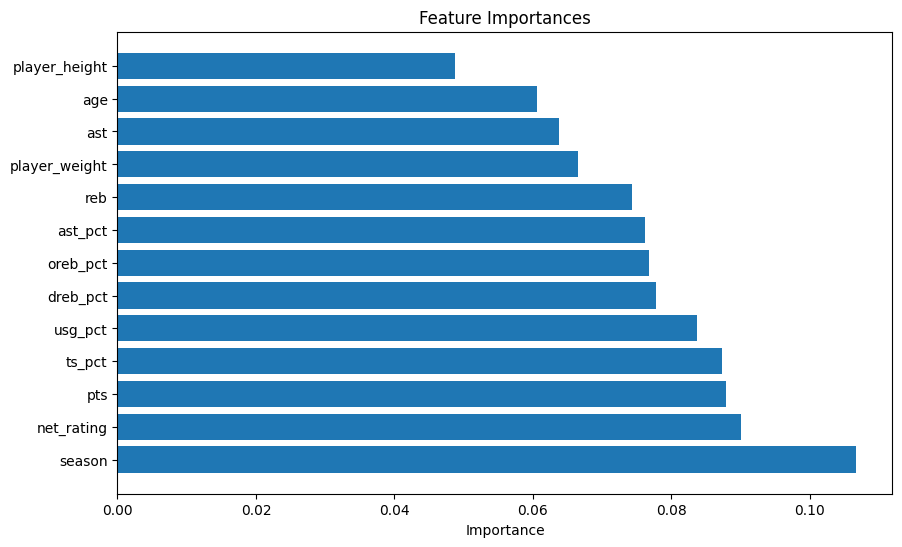

In [95]:
feature_names = injuries_bool.columns[:-1]
importances = rfc_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

Plot injuries season-over-season

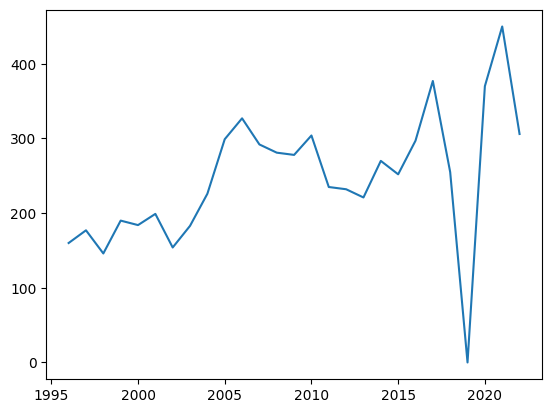

In [96]:
#2019 is removed
x = range(1996, 2023)
y = [0 for i in range(2022-1995)]
for i in range(len(injuries_bool['season'])):
  if(not i==10631):
    y[injuries_bool['season'][i]-1996]+=injuries_bool['injuries'][i]
plt.plot(x, y)
plt.show()

In [97]:
y

[160,
 177,
 146,
 190,
 184,
 199,
 154,
 183,
 226,
 299,
 327,
 292,
 281,
 278,
 304,
 235,
 232,
 221,
 270,
 252,
 297,
 377,
 255,
 0,
 370,
 450,
 306]

In [98]:
injuries_bool[(injuries_bool['season']==2019) & (injuries_bool['injuries']==1)]

Empty DataFrame
Columns: [age, player_height, player_weight, pts, reb, ast, net_rating, oreb_pct, dreb_pct, usg_pct, ts_pct, ast_pct, season, injuries]
Index: []

In [99]:
player_stats[(player_stats['season']==1998) & (player_stats['player_name'] =='Will Perdue')]

player_name team_abbreviation   age  player_height  player_weight  \
1315  Will Perdue               SAS  33.0         213.36      108.86208   

         college country draft_year draft_round draft_number  ...  reb  ast  \
1315  Vanderbilt     USA       1988           1           11  ...  3.7  0.5   

      net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
1315         5.6     0.096     0.245    0.098    0.63    0.064    1998   

      injuries  
1315   [ankle]  

[1 rows x 22 columns]

# **Association Rule Mining**

In [100]:
from mlxtend.frequent_patterns import apriori, association_rules

In [101]:
injuries_bool

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age  player_height  player_weight   pts  reb  ast  net_rating  \
0      33.0         205.74     102.058200   7.2  7.9  0.8        -8.0   
1      24.0         195.58      94.800728   5.2  2.7  1.9         5.2   
2      25.0         205.74     102.058200   6.2  4.3  0.5        -8.3   
3      27.0         210.82     108.862080   4.0  2.0  0.4        -6.4   
4      27.0         205.74     109.315672   3.8  3.5  0.5         6.7   
...     ...            ...            ...   ...  ...  ...         ...   
12310  25.0         210.82     113.398000  11.6  6.4  2.9        -7.5   
12311  28.0         195.58      90.718400  24.8  4.5  4.2         0.3   
12312  22.0         205.74     108.862080   5.2  2.6  0.3        -5.9   
12313  21.0         205.74      83.914520   5.7  2.1  0.9        -5.2   
12314  22.0         198.12     128.820128  26.0  7.0  4.6         7.8   

       oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  injuries  
0         0.100     0.207    0.119   0.523    0.045    1996         0  
1         0.031     0.129    0.147   0.524    0.163    1996         0  
2         0.129     0.163    0.168   0.599    0.051    1996         0  
3         0.079     0.140    0.224   0.435    0.077    1996         0  
4         0.110     0.177    0.126   0.572    0.051    1996         1  
...         ...       ...      ...     ...      ...     ...       ...  
12310     0.076     0.190    0.209   0.599    0.180    2022         1  
12311     0.016     0.108    0.278   0.607    0.187    2022         1  
12312     0.087     0.099    0.149   0.620    0.040    2022         1  
12313     0.028     0.105    0.178   0.511    0.086    2022         1  
12314     0.060     0.148    0.288   0.652    0.231    2022         1  

[12315 rows x 14 columns]

In [102]:
arm = injuries_bool.copy()
for column in arm.columns:
  for i in range(len(arm)):
    if arm[column][i]>=arm[column].mean():
      arm[column][i] = 1
    else:
      arm[column][i] = 0


Streaming output truncated to the last 5000 lines.
<ipython-input-102-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-102-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-102-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arm[column][i] = 1
<ipython-input-102-13f6cf6b22a6>:5: SettingWithCopyWarning: 
A value is trying to be 

In [103]:
arm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age  player_height  player_weight  pts  reb  ast  net_rating  oreb_pct  \
0      1.0            1.0            1.0  0.0  1.0  0.0         0.0       1.0   
1      0.0            0.0            0.0  0.0  0.0  1.0         1.0       0.0   
2      0.0            1.0            1.0  0.0  1.0  0.0         0.0       1.0   
3      0.0            1.0            1.0  0.0  0.0  0.0         0.0       1.0   
4      0.0            1.0            1.0  0.0  0.0  0.0         1.0       1.0   
...    ...            ...            ...  ...  ...  ...         ...       ...   
12310  1.0            1.0            1.0  1.0  1.0  1.0         0.0       0.0   
12311  1.0            1.0            1.0  1.0  1.0  1.0         0.0       0.0   
12312  1.0            1.0            1.0  1.0  1.0  0.0         0.0       0.0   
12313  1.0            1.0            1.0  1.0  1.0  1.0         0.0       0.0   
12314  1.0            1.0            1.0  1.0  1.0  1.0         1.0       0.0   

       dreb_pct  usg_pct  ts_pct  ast_pct  season  injuries  
0           1.0      0.0     1.0      0.0       0         0  
1           0.0      0.0     1.0      1.0       0         0  
2           1.0      0.0     1.0      0.0       0         0  
3           0.0      1.0     0.0      0.0       0         0  
4           1.0      0.0     1.0      0.0       0         1  
...         ...      ...     ...      ...     ...       ...  
12310       0.0      0.0     1.0      0.0       1         1  
12311       0.0      1.0     1.0      0.0       1         1  
12312       0.0      0.0     1.0      0.0       1         1  
12313       0.0      0.0     0.0      0.0       1         1  
12314       0.0      1.0     1.0      1.0       1         1  

[12315 rows x 14 columns]

In [104]:
arm_sets = apriori(arm, min_support = 0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [105]:
arm_rules = association_rules(arm_sets, metric= 'lift', min_threshold = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
arm_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


antecedents                                        consequents  \
0      (player_height)                                              (age)   
1                (age)                                    (player_height)   
2      (player_weight)                                              (age)   
3                (age)                                    (player_weight)   
4                (pts)                                              (age)   
...                ...                                                ...   
71763            (ast)  (ts_pct, player_weight, injuries, season, play...   
71764     (net_rating)  (ts_pct, player_weight, injuries, season, play...   
71765            (pts)  (ts_pct, player_weight, injuries, season, play...   
71766            (age)  (ts_pct, player_weight, injuries, season, play...   
71767            (reb)  (ts_pct, player_weight, injuries, season, play...   

       antecedent support  consequent support   support  confidence      lift  \
0                0.981161            0.948924  0.937312    0.955309  1.006729   
1                0.948924            0.981161  0.937312    0.987763  1.006729   
2                0.947219            0.948924  0.910678    0.961423  1.013172   
3                0.948924            0.947219  0.910678    0.959695  1.013172   
4                0.673975            0.948924  0.654892    0.971687  1.023988   
...                   ...                 ...       ...         ...       ...   
71763            0.544702            0.129111  0.103289    0.189624  1.468694   
71764            0.476086            0.167438  0.103289    0.216954  1.295725   
71765            0.673975            0.104182  0.103289    0.153253  1.471014   
71766            0.948924            0.103695  0.103289    0.108848  1.049699   
71767            0.687454            0.109460  0.103289    0.150248  1.372630   

       leverage  conviction  zhangs_metric  
0      0.006265    1.142871       0.354785  
1      0.006265    1.539513       0.130859  
2      0.011839    1.324001       0.246310  
3      0.011839    1.309556       0.254533  
4      0.015341    1.803958       0.071853  
...         ...         ...            ...  
71763  0.032962    1.074673       0.700910  
71764  0.023574    1.063235       0.435628  
71765  0.033073    1.057953       0.982123  
71766  0.004890    1.005783       0.926971  
71767  0.028040    1.048000       0.868581  

[71768 rows x 10 columns]

In [107]:
arm_result_injuries = arm_rules[arm_rules['consequents']==frozenset({'injuries'})]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
arm_result_injuries[(arm_result_injuries['confidence']>=0.5) & (arm_result_injuries['lift']>1.07)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents consequents  \
24693             (ts_pct, player_weight, ast, age, reb)  (injuries)   
38374  (ts_pct, player_weight, player_height, ast, ag...  (injuries)   
43962        (ts_pct, player_weight, ast, pts, age, reb)  (injuries)   
46094     (ts_pct, player_weight, season, ast, age, reb)  (injuries)   
54237  (ts_pct, player_weight, player_height, ast, pt...  (injuries)   
58545  (ts_pct, player_weight, season, player_height,...  (injuries)   
61845  (ts_pct, player_weight, season, ast, pts, age,...  (injuries)   
67182  (ts_pct, player_weight, season, player_height,...  (injuries)   

       antecedent support  consequent support   support  confidence      lift  \
24693            0.291027            0.541291  0.168819    0.580078  1.071656   
38374            0.290865            0.541291  0.168737    0.580123  1.071739   
43962            0.289160            0.541291  0.167682    0.579893  1.071315   
46094            0.290540            0.541291  0.168656    0.580492  1.072421   
54237            0.288997            0.541291  0.167600    0.579938  1.071398   
58545            0.290459            0.541291  0.168575    0.580375  1.072204   
61845            0.288672            0.541291  0.167519    0.580309  1.072084   
67182            0.288591            0.541291  0.167438    0.580191  1.071866   

       leverage  conviction  zhangs_metric  
24693  0.011288    1.092367       0.094313  
38374  0.011295    1.092484       0.094393  
43962  0.011162    1.091887       0.093647  
46094  0.011389    1.093445       0.095185  
54237  0.011169    1.092003       0.093727  
58545  0.011352    1.093139       0.094909  
61845  0.011264    1.092969       0.094523  
67182  0.011226    1.092662       0.094246

Other papers used game by game data to see what happened in the previous game;
Add other datasets;
Try with non-numeric;
Find some variables that could be correlated, or teams have discussed(Wisdom that relates to certain things);
ethnicity, country, etc;
**Later**: Artificially create data; maybe add minutes played

# **Adding Combine Stats**

In [109]:
player_stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name team_abbreviation   age  player_height  player_weight  \
0           A.C. Green               DAL  33.0         205.74     102.058200   
1          Aaron McKie               DET  24.0         195.58      94.800728   
2       Aaron Williams               VAN  25.0         205.74     102.058200   
3            Acie Earl               MIL  27.0         210.82     108.862080   
4           Adam Keefe               UTA  27.0         205.74     109.315672   
...                ...               ...   ...            ...            ...   
12839     Zach Collins               SAS  25.0         210.82     113.398000   
12840      Zach LaVine               CHI  28.0         195.58      90.718400   
12841       Zeke Nnaji               DEN  22.0         205.74     108.862080   
12842  Ziaire Williams               MEM  21.0         205.74      83.914520   
12843  Zion Williamson               NOP  22.0         198.12     128.820128   

            college country draft_year draft_round draft_number  ...  reb  \
0      Oregon State     USA       1985           1           23  ...  7.9   
1            Temple     USA       1994           1           17  ...  2.7   
2            Xavier     USA  Undrafted   Undrafted    Undrafted  ...  4.3   
3              Iowa     USA       1993           1           19  ...  2.0   
4          Stanford     USA       1992           1           10  ...  3.5   
...             ...     ...        ...         ...          ...  ...  ...   
12839       Gonzaga     USA       2017           1           10  ...  6.4   
12840          UCLA     USA       2014           1           13  ...  4.5   
12841       Arizona     USA       2020           1           22  ...  2.6   
12842      Stanford     USA       2021           1           10  ...  2.1   
12843          Duke     USA       2019           1            1  ...  7.0   

       ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  season  \
0      0.8        -8.0     0.100     0.207    0.119   0.523    0.045    1996   
1      1.9         5.2     0.031     0.129    0.147   0.524    0.163    1996   
2      0.5        -8.3     0.129     0.163    0.168   0.599    0.051    1996   
3      0.4        -6.4     0.079     0.140    0.224   0.435    0.077    1996   
4      0.5         6.7     0.110     0.177    0.126   0.572    0.051    1996   
...    ...         ...       ...       ...      ...     ...      ...     ...   
12839  2.9        -7.5     0.076     0.190    0.209   0.599    0.180    2022   
12840  4.2         0.3     0.016     0.108    0.278   0.607    0.187    2022   
12841  0.3        -5.9     0.087     0.099    0.149   0.620    0.040    2022   
12842  0.9        -5.2     0.028     0.105    0.178   0.511    0.086    2022   
12843  4.6         7.8     0.060     0.148    0.288   0.652    0.231    2022   

                         injuries  
0                              []  
1                              []  
2                              []  
3                              []  
4                         [other]  
...                           ...  
12839             [ankle, finger]  
12840               [knee, other]  
12841            [shoulder, knee]  
12842                      [foot]  
12843  [back, foot, other, other]  

[12844 rows x 22 columns]

In [110]:
combine_stats = pd.read_csv('Draft_Combine.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
combine_stats.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PLAYER  YEAR POS  HEIGHT  WEIGHT    BMI  BODY FAT  \
0         Agbaji, Ochai  2022  SG   76.50   216.8  26.04       5.4   
1  Baldwin Jr., Patrick  2022  SF   81.25   230.8  24.58       8.9   
2      Barlow, Dominick  2022  PF   80.75   221.0  23.83       5.9   
3     Beauchamp, MarJon  2022  SG   77.25   196.6  23.16       5.3   
4          Besson, Hugo  2022  SG   76.50   180.4  21.67       8.8   

   STANDING REACH  WINGSPAN  HAND LENGTH  ...  STANDING VERTICAL  \
0           104.0     82.25         8.75  ...               32.0   
1           110.5     85.75         8.75  ...               23.5   
2           108.5     87.00         9.00  ...               28.5   
3           106.0     84.75         9.00  ...                NaN   
4           102.0     77.50         7.50  ...               24.5   

   VERTICAL LEAP  LANE AGILITY  SHUTTLE RUN  THREE QUARTER SPRINT  \
0           39.0         10.77         3.11                  3.13   
1           26.5         12.25         3.30                  3.45   
2           34.0         11.29         3.19                  3.33   
3            NaN           NaN          NaN                   NaN   
4           31.5         11.36         3.25                  3.40   

   BENCH PRESS    BAR   PAN    PBH    PDT  
0          NaN  1.075  83.1  136.0  143.0  
1          NaN  1.055  83.1  134.0  137.0  
2          NaN  1.077  94.5  137.0  142.5  
3          NaN  1.097  81.0    NaN    NaN  
4          NaN  1.013  63.8  126.5  133.5  

[5 rows x 21 columns]

Transform each name into something without a string with first, last and without a comma

In [112]:
for i in range(len(combine_stats)):
  commaindex = combine_stats['PLAYER'][i].find(',')
  combine_stats['PLAYER'][i] = combine_stats['PLAYER'][i][commaindex+2: ]+ " " +combine_stats['PLAYER'][i][:commaindex]

Streaming output truncated to the last 5000 lines.
<ipython-input-112-56926e08bd57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_stats['PLAYER'][i] = combine_stats['PLAYER'][i][commaindex+2: ]+ " " +combine_stats['PLAYER'][i][:commaindex]
<ipython-input-112-56926e08bd57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine_stats['PLAYER'][i] = combine_stats['PLAYER'][i][commaindex+2: ]+ " " +combine_stats['PLAYER'][i][:commaindex]
<ipython-input-112-56926e08bd57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [113]:
combine_stats.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PLAYER  YEAR POS  HEIGHT  WEIGHT    BMI  BODY FAT  \
0         Ochai Agbaji  2022  SG   76.50   216.8  26.04       5.4   
1  Patrick Baldwin Jr.  2022  SF   81.25   230.8  24.58       8.9   
2      Dominick Barlow  2022  PF   80.75   221.0  23.83       5.9   
3     MarJon Beauchamp  2022  SG   77.25   196.6  23.16       5.3   
4          Hugo Besson  2022  SG   76.50   180.4  21.67       8.8   

   STANDING REACH  WINGSPAN  HAND LENGTH  ...  STANDING VERTICAL  \
0           104.0     82.25         8.75  ...               32.0   
1           110.5     85.75         8.75  ...               23.5   
2           108.5     87.00         9.00  ...               28.5   
3           106.0     84.75         9.00  ...                NaN   
4           102.0     77.50         7.50  ...               24.5   

   VERTICAL LEAP  LANE AGILITY  SHUTTLE RUN  THREE QUARTER SPRINT  \
0           39.0         10.77         3.11                  3.13   
1           26.5         12.25         3.30                  3.45   
2           34.0         11.29         3.19                  3.33   
3            NaN           NaN          NaN                   NaN   
4           31.5         11.36         3.25                  3.40   

   BENCH PRESS    BAR   PAN    PBH    PDT  
0          NaN  1.075  83.1  136.0  143.0  
1          NaN  1.055  83.1  134.0  137.0  
2          NaN  1.077  94.5  137.0  142.5  
3          NaN  1.097  81.0    NaN    NaN  
4          NaN  1.013  63.8  126.5  133.5  

[5 rows x 21 columns]

In [114]:
player_stats_new = player_stats[~(player_stats['draft_year']=='Undrafted')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [115]:
player_stats_new['draft_year'] = player_stats_new['draft_year'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-115-9a1ab4ece0df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_stats_new['draft_year'] = player_stats_new['draft_year'].astype(int)


In [116]:
player_stats_new = player_stats_new[player_stats_new['draft_year']>=2000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
player_stats_new.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name team_abbreviation   age  player_height  \
1758         A.J. Guyton               CHI  23.0         185.42   
1803      Brian Cardinal               DET  24.0         203.20   
1830          Chris Mihm               CLE  21.0         215.90   
1833        Chris Porter               GSW  23.0         200.66   
1846  Courtney Alexander               WAS  24.0         195.58   

      player_weight       college country  draft_year draft_round  \
1758      81.646560       Indiana     USA        2000           2   
1803     111.130040        Purdue     USA        2000           2   
1830     120.201880         Texas     USA        2000           1   
1833      98.883056        Auburn     USA        2000           2   
1846      92.986360  Fresno State     USA        2000           1   

     draft_number  ...  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  \
1758           32  ...  1.1  1.9       -12.4     0.018     0.053    0.169   
1803           44  ...  1.5  0.2       -14.2     0.068     0.140    0.162   
1830            7  ...  4.7  0.3        -3.8     0.106     0.167    0.203   
1833           55  ...  3.7  1.2       -13.4     0.071     0.103    0.204   
1846           13  ...  2.2  1.0       -10.1     0.036     0.085    0.232   

      ts_pct  ast_pct  season            injuries  
1758   0.495    0.198    2000              [knee]  
1803   0.398    0.052    2000  [knee, knee, knee]  
1830   0.500    0.024    2000             [ankle]  
1833   0.434    0.088    2000                  []  
1846   0.484    0.083    2000                  []  

[5 rows x 22 columns]

In [118]:
player_stats.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'injuries'],
      dtype='object')

In [119]:
combine_stats.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['PLAYER', 'YEAR', 'POS', 'HEIGHT', 'WEIGHT', 'BMI', 'BODY FAT',
       'STANDING REACH', 'WINGSPAN', 'HAND LENGTH', 'HAND WIDTH',
       'STANDING VERTICAL', 'VERTICAL LEAP', 'LANE AGILITY', 'SHUTTLE RUN',
       'THREE QUARTER SPRINT', 'BENCH PRESS', 'BAR', 'PAN', 'PBH', 'PDT'],
      dtype='object')

In [120]:
combine_stats = combine_stats.drop(axis=1, columns = ['HEIGHT', 'WEIGHT'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
player_stats_new = player_stats_new.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
player_with_combine = pd.concat([player_stats_new, combine_stats], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
player_with_combine = player_with_combine.drop(axis = 1, columns = ['PLAYER','YEAR'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [124]:
player_with_combine.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'injuries', 'POS',
       'BMI', 'BODY FAT', 'STANDING REACH', 'WINGSPAN', 'HAND LENGTH',
       'HAND WIDTH', 'STANDING VERTICAL', 'VERTICAL LEAP', 'LANE AGILITY',
       'SHUTTLE RUN', 'THREE QUARTER SPRINT', 'BENCH PRESS', 'BAR', 'PAN',
       'PBH', 'PDT'],
      dtype='object')

In [125]:
combine_stats.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['PLAYER', 'YEAR', 'POS', 'BMI', 'BODY FAT', 'STANDING REACH',
       'WINGSPAN', 'HAND LENGTH', 'HAND WIDTH', 'STANDING VERTICAL',
       'VERTICAL LEAP', 'LANE AGILITY', 'SHUTTLE RUN', 'THREE QUARTER SPRINT',
       'BENCH PRESS', 'BAR', 'PAN', 'PBH', 'PDT'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
combine_players = list(combine_stats['PLAYER'])

for i in range(len(player_with_combine)):
  try:
    ind = combine_players.index(player_with_combine['player_name'][i])
    for column in combine_stats.columns[2: ]:
      player_with_combine[column][i] = combine_stats[column][ind]
  except:
    player_with_combine['PDT'][i] = 'Missing'





Streaming output truncated to the last 5000 lines.
<ipython-input-126-d115a4002124>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine[column][i] = combine_stats[column][ind]
<ipython-input-126-d115a4002124>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine[column][i] = combine_stats[column][ind]
<ipython-input-126-d115a4002124>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine[co

In [127]:
player_with_combine = player_with_combine[~(player_with_combine['PDT']=='Missing')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
player_with_combine = player_with_combine.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
player_with_combine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name team_abbreviation   age  player_height  player_weight  \
0         A.J. Guyton               CHI  23.0         185.42      81.646560   
1        Chris Porter               GSW  23.0         200.66      98.883056   
2          Dan Langhi               HOU  23.0         210.82      99.790240   
3      Dan McClintock               DEN  24.0         213.36     122.469840   
4      Donnell Harvey               DAL  20.0         203.20      99.790240   
...               ...               ...   ...            ...            ...   
4748      Will Barton               TOR  32.0         195.58      82.100152   
4749     Zach Collins               SAS  25.0         210.82     113.398000   
4750      Zach LaVine               CHI  28.0         195.58      90.718400   
4751       Zeke Nnaji               DEN  22.0         205.74     108.862080   
4752  Ziaire Williams               MEM  21.0         205.74      83.914520   

               college country  draft_year draft_round draft_number  ...  \
0              Indiana     USA        2000           2           32  ...   
1               Auburn     USA        2000           2           55  ...   
2           Vanderbilt     USA        2000           2           31  ...   
3     Northern Arizona     USA        2000           2           53  ...   
4              Florida     USA        2000           1           22  ...   
...                ...     ...         ...         ...          ...  ...   
4748           Memphis     USA        2012           2           40  ...   
4749           Gonzaga     USA        2017           1           10  ...   
4750              UCLA     USA        2014           1           13  ...   
4751           Arizona     USA        2020           1           22  ...   
4752          Stanford     USA        2021           1           10  ...   

      STANDING VERTICAL  VERTICAL LEAP  LANE AGILITY  SHUTTLE RUN  \
0                  33.0           37.5         10.55          NaN   
1                  28.5           35.0         10.93          NaN   
2                  31.0           34.5         10.85          NaN   
3                  33.0           35.0         11.52          NaN   
4                  33.0           32.5         11.23          NaN   
...                 ...            ...           ...          ...   
4748               30.0           34.0         12.50          NaN   
4749                NaN            NaN           NaN          NaN   
4750               33.5           41.5         10.42         2.80   
4751               33.0           38.0         10.94         2.72   
4752               34.0           39.5         10.69         3.04   

      THREE QUARTER SPRINT  BENCH PRESS    BAR   PAN    PBH    PDT  
0                     3.22          9.0  1.041   NaN  130.5  135.0  
1                     3.20          6.0  1.052   NaN  132.0  138.5  
2                     3.24         12.0  0.988   NaN  135.0  138.5  
3                     3.33         20.0  1.030   NaN  140.0  142.0  
4                      NaN         15.0  1.066   NaN  138.5  138.0  
...                    ...          ...    ...   ...    ...    ...  
4748                  3.60          0.0  1.062  85.5  132.5  136.5  
4749                   NaN          NaN  1.033  80.9    NaN    NaN  
4750                  3.19          NaN  1.049  72.2  133.5  141.5  
4751                  3.20          NaN  1.058  94.5  138.5  143.5  
4752                  3.12          NaN  1.025  78.8  140.5  146.0  

[4753 rows x 39 columns]

Move injuries to end

In [130]:
injuries_from_combine = player_with_combine['injuries']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
player_with_combine = player_with_combine.drop(columns = ['injuries'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
player_with_combine['injuries'] = injuries_from_combine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [133]:
player_with_combine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name team_abbreviation   age  player_height  player_weight  \
0         A.J. Guyton               CHI  23.0         185.42      81.646560   
1        Chris Porter               GSW  23.0         200.66      98.883056   
2          Dan Langhi               HOU  23.0         210.82      99.790240   
3      Dan McClintock               DEN  24.0         213.36     122.469840   
4      Donnell Harvey               DAL  20.0         203.20      99.790240   
...               ...               ...   ...            ...            ...   
4748      Will Barton               TOR  32.0         195.58      82.100152   
4749     Zach Collins               SAS  25.0         210.82     113.398000   
4750      Zach LaVine               CHI  28.0         195.58      90.718400   
4751       Zeke Nnaji               DEN  22.0         205.74     108.862080   
4752  Ziaire Williams               MEM  21.0         205.74      83.914520   

               college country  draft_year draft_round draft_number  ...  \
0              Indiana     USA        2000           2           32  ...   
1               Auburn     USA        2000           2           55  ...   
2           Vanderbilt     USA        2000           2           31  ...   
3     Northern Arizona     USA        2000           2           53  ...   
4              Florida     USA        2000           1           22  ...   
...                ...     ...         ...         ...          ...  ...   
4748           Memphis     USA        2012           2           40  ...   
4749           Gonzaga     USA        2017           1           10  ...   
4750              UCLA     USA        2014           1           13  ...   
4751           Arizona     USA        2020           1           22  ...   
4752          Stanford     USA        2021           1           10  ...   

      VERTICAL LEAP  LANE AGILITY  SHUTTLE RUN  THREE QUARTER SPRINT  \
0              37.5         10.55          NaN                  3.22   
1              35.0         10.93          NaN                  3.20   
2              34.5         10.85          NaN                  3.24   
3              35.0         11.52          NaN                  3.33   
4              32.5         11.23          NaN                   NaN   
...             ...           ...          ...                   ...   
4748           34.0         12.50          NaN                  3.60   
4749            NaN           NaN          NaN                   NaN   
4750           41.5         10.42         2.80                  3.19   
4751           38.0         10.94         2.72                  3.20   
4752           39.5         10.69         3.04                  3.12   

      BENCH PRESS    BAR   PAN    PBH    PDT               injuries  
0             9.0  1.041   NaN  130.5  135.0                 [knee]  
1             6.0  1.052   NaN  132.0  138.5                     []  
2            12.0  0.988   NaN  135.0  138.5                 [shin]  
3            20.0  1.030   NaN  140.0  142.0                     []  
4            15.0  1.066   NaN  138.5  138.0  [elbow, elbow, elbow]  
...           ...    ...   ...    ...    ...                    ...  
4748          0.0  1.062  85.5  132.5  136.5          [foot, ankle]  
4749          NaN  1.033  80.9    NaN    NaN        [ankle, finger]  
4750          NaN  1.049  72.2  133.5  141.5          [knee, other]  
4751          NaN  1.058  94.5  138.5  143.5       [shoulder, knee]  
4752          NaN  1.025  78.8  140.5  146.0                 [foot]  

[4753 rows x 39 columns]

Slides, update sent with papers/posters from Sloan, complete analysis on combine
Player tracking data to make something like a shot chart; folder with all objects related to this project

In [134]:
player_with_combine.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name                0
team_abbreviation          0
age                        0
player_height              0
player_weight              0
college                  381
country                    0
draft_year                 0
draft_round                0
draft_number               0
gp                         0
pts                        0
reb                        0
ast                        0
net_rating                 0
oreb_pct                   0
dreb_pct                   0
usg_pct                    0
ts_pct                     0
ast_pct                    0
season                     0
POS                        0
BMI                       31
BODY FAT                 639
STANDING REACH            20
WINGSPAN                  10
HAND LENGTH             2515
HAND WIDTH              2515
STANDING VERTICAL        565
VERTICAL LEAP            576
LANE AGILITY             631
SHUTTLE RUN             3712
THREE QUARTER SPRINT     594
BENCH PRESS             1020
BAR                       20
PAN                     2515
PBH                      565
PDT                      576
injuries                   0
dtype: int64

In [135]:
player_with_combine = player_with_combine.drop(columns = ['HAND LENGTH', 'HAND WIDTH', 'SHUTTLE RUN', 'BENCH PRESS', 'PAN'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
player_with_combine = player_with_combine.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
player_with_combine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name team_abbreviation   age  player_height  player_weight  \
16           Alton Ford               PHX  21.0         205.74     124.737800   
18        Bobby Simmons               WAS  22.0         198.12     106.594120   
19    Brandon Armstrong               NJN  22.0         195.58      85.275296   
20      Brendan Haywood               WAS  22.0         213.36     120.655472   
21     Brian Scalabrine               NJN  24.0         205.74     108.862080   
...                 ...               ...   ...            ...            ...   
4746     Victor Oladipo               MIA  31.0         190.50      96.615096   
4748        Will Barton               TOR  32.0         195.58      82.100152   
4750        Zach LaVine               CHI  28.0         195.58      90.718400   
4751         Zeke Nnaji               DEN  22.0         205.74     108.862080   
4752    Ziaire Williams               MEM  21.0         205.74      83.914520   

                  college country  draft_year draft_round draft_number  ...  \
16                Houston     USA        2001           2           50  ...   
18                 DePaul     USA        2001           2           41  ...   
19             Pepperdine     USA        2001           1           23  ...   
20         North Carolina     USA        2001           1           20  ...   
21    Southern California     USA        2001           2           34  ...   
...                   ...     ...         ...         ...          ...  ...   
4746              Indiana     USA        2013           1            2  ...   
4748              Memphis     USA        2012           2           40  ...   
4750                 UCLA     USA        2014           1           13  ...   
4751              Arizona     USA        2020           1           22  ...   
4752             Stanford     USA        2021           1           10  ...   

      STANDING REACH  WINGSPAN  STANDING VERTICAL  VERTICAL LEAP  \
16             102.5     82.50               34.5           36.5   
18             105.0     84.25               27.5           34.0   
19              99.5     81.50               30.0           37.0   
20             113.5     90.50               27.0           28.5   
21             105.5     81.75               27.0           30.5   
...              ...       ...                ...            ...   
4746           100.5     81.25               33.0           42.0   
4748           102.5     81.75               30.0           34.0   
4750           100.0     80.25               33.5           41.5   
4751           105.5     86.00               33.0           38.0   
4752           106.5     82.25               34.0           39.5   

      LANE AGILITY  THREE QUARTER SPRINT    BAR    PBH    PDT  \
16           11.70                  3.16  1.028  137.0  139.0   
18           11.69                  3.41  1.077  132.5  139.0   
19           10.91                  3.20  1.079  129.5  136.5   
20           12.87                  3.50  1.081  140.5  142.0   
21           11.75                  3.47  1.012  132.5  136.0   
...            ...                   ...    ...    ...    ...   
4746         10.69                  3.25  1.080  133.5  142.5   
4748         12.50                  3.60  1.062  132.5  136.5   
4750         10.42                  3.19  1.049  133.5  141.5   
4751         10.94                  3.20  1.058  138.5  143.5   
4752         10.69                  3.12  1.025  140.5  146.0   

              injuries  
16              [back]  
18        [knee, knee]  
19              [knee]  
20             [thumb]  
21              [foot]  
...                ...  
4746      [knee, knee]  
4748     [foot, ankle]  
4750     [knee, other]  
4751  [shoulder, knee]  
4752            [foot]  

[3322 rows x 34 columns]

In [138]:
player_with_combine = player_with_combine.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
for i in range(len(player_with_combine['injuries'])):
  if len(player_with_combine['injuries'][i])>0:
    player_with_combine['injuries'][i] = 1
  else:
    player_with_combine['injuries'][i] = 0

Streaming output truncated to the last 5000 lines.
<ipython-input-139-0daff6370a64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine['injuries'][i] = 1
<ipython-input-139-0daff6370a64>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine['injuries'][i] = 0
<ipython-input-139-0daff6370a64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine['injuries'][i] = 1
<ipython-input-139-0daff6

In [140]:
player_with_combine.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name              object
team_abbreviation        object
age                     float64
player_height           float64
player_weight           float64
college                  object
country                  object
draft_year                int64
draft_round              object
draft_number             object
gp                        int64
pts                     float64
reb                     float64
ast                     float64
net_rating              float64
oreb_pct                float64
dreb_pct                float64
usg_pct                 float64
ts_pct                  float64
ast_pct                 float64
season                    int64
POS                      object
BMI                     float64
BODY FAT                float64
STANDING REACH          float64
WINGSPAN                float64
STANDING VERTICAL       float64
VERTICAL LEAP           float64
LANE AGILITY            float64
THREE QUARTER SPRINT    float64
BAR                     float64
PBH                     float64
PDT                      object
injuries                 object
dtype: object

In [141]:
player_with_combine["injuries"] = pd.to_numeric(player_with_combine["injuries"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [142]:
player_with_combine.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


player_name              object
team_abbreviation        object
age                     float64
player_height           float64
player_weight           float64
college                  object
country                  object
draft_year                int64
draft_round              object
draft_number             object
gp                        int64
pts                     float64
reb                     float64
ast                     float64
net_rating              float64
oreb_pct                float64
dreb_pct                float64
usg_pct                 float64
ts_pct                  float64
ast_pct                 float64
season                    int64
POS                      object
BMI                     float64
BODY FAT                float64
STANDING REACH          float64
WINGSPAN                float64
STANDING VERTICAL       float64
VERTICAL LEAP           float64
LANE AGILITY            float64
THREE QUARTER SPRINT    float64
BAR                     float64
PBH                     float64
PDT                      object
injuries                  int64
dtype: object

In [143]:
player_with_combine['POS'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['PF', 'SF', 'SG', 'C', 'SF/PF', 'PG', 'PF/C', 'SG/SF', 'PG/SG'],
      dtype=object)

In [144]:
pos_dict = {'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5, 'SF/PF': 3, 'PF/C': 4, 'SG/SF': 2, 'PG/SG': 1}
for i in range(len(player_with_combine)):
  player_with_combine['POS'][i] = pos_dict[player_with_combine['POS'][i]]


Streaming output truncated to the last 5000 lines.
<ipython-input-144-c50e898c41c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine['POS'][i] = pos_dict[player_with_combine['POS'][i]]
<ipython-input-144-c50e898c41c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_with_combine['POS'][i] = pos_dict[player_with_combine['POS'][i]]
<ipython-input-144-c50e898c41c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [145]:
player_with_combine['POS'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    4
1    3
2    2
3    5
4    3
Name: POS, dtype: object

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
player_with_combine['POS'] = pd.to_numeric(player_with_combine['POS'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
player_with_combine = player_with_combine.select_dtypes('number')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [148]:
player_with_combine

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


age  player_height  player_weight  draft_year  gp   pts  reb  ast  \
0     21.0         205.74     124.737800        2001  53   3.1  2.0  0.1   
1     22.0         198.12     106.594120        2001  30   3.7  1.7  0.6   
2     22.0         195.58      85.275296        2001  35   1.8  0.5  0.2   
3     22.0         213.36     120.655472        2001  62   5.1  5.2  0.5   
4     24.0         205.74     108.862080        2001  28   2.1  1.8  0.8   
...    ...            ...            ...         ...  ..   ...  ...  ...   
3317  31.0         190.50      96.615096        2013  42  10.7  3.0  3.5   
3318  32.0         195.58      82.100152        2012  56   6.8  2.4  2.0   
3319  28.0         195.58      90.718400        2014  77  24.8  4.5  4.2   
3320  22.0         205.74     108.862080        2020  53   5.2  2.6  0.3   
3321  21.0         205.74      83.914520        2021  37   5.7  2.1  0.9   

      net_rating  oreb_pct  ...  BODY FAT  STANDING REACH  WINGSPAN  \
0           -8.7     0.085  ...       8.0           102.5     82.50   
1            0.5     0.087  ...       6.7           105.0     84.25   
2           -8.9     0.051  ...       9.3            99.5     81.50   
3           -1.3     0.126  ...      12.9           113.5     90.50   
4            2.4     0.047  ...      13.6           105.5     81.75   
...          ...       ...  ...       ...             ...       ...   
3317        -1.5     0.014  ...       6.6           100.5     81.25   
3318        -8.4     0.014  ...       4.1           102.5     81.75   
3319         0.3     0.016  ...       4.7           100.0     80.25   
3320        -5.9     0.087  ...       5.9           105.5     86.00   
3321        -5.2     0.028  ...       4.4           106.5     82.25   

      STANDING VERTICAL  VERTICAL LEAP  LANE AGILITY  THREE QUARTER SPRINT  \
0                  34.5           36.5         11.70                  3.16   
1                  27.5           34.0         11.69                  3.41   
2                  30.0           37.0         10.91                  3.20   
3                  27.0           28.5         12.87                  3.50   
4                  27.0           30.5         11.75                  3.47   
...                 ...            ...           ...                   ...   
3317               33.0           42.0         10.69                  3.25   
3318               30.0           34.0         12.50                  3.60   
3319               33.5           41.5         10.42                  3.19   
3320               33.0           38.0         10.94                  3.20   
3321               34.0           39.5         10.69                  3.12   

        BAR    PBH  injuries  
0     1.028  137.0         1  
1     1.077  132.5         1  
2     1.079  129.5         1  
3     1.081  140.5         1  
4     1.012  132.5         1  
...     ...    ...       ...  
3317  1.080  133.5         1  
3318  1.062  132.5         1  
3319  1.049  133.5         1  
3320  1.058  138.5         1  
3321  1.025  140.5         1  

[3322 rows x 27 columns]

In [149]:
player_with_combine= player_with_combine.drop(columns = ['gp'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
from sklearn.utils import shuffle
player_with_combine = shuffle(player_with_combine)
train_combine, valid_combine, test_combine = np.split(player_with_combine.sample(frac=1), [int(0.6*len(player_with_combine)), int(0.8*len(player_with_combine))])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [152]:
train_combine, x_train_combine, y_train_combine = scale(train_combine, oversample = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
valid_combine, x_valid_combine, y_valid_combine = scale(valid_combine, oversample = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
test_combine, x_test_combine, y_test_combine = scale(test_combine, oversample = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
pd.DataFrame(y_train_combine).dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    int64
dtype: object

In [156]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train_combine, y_train_combine)
y_pred = nb_model.predict(x_test_combine)
print(classification_report(y_test_combine, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.37      0.39       247
           1       0.65      0.69      0.67       418

    accuracy                           0.57       665
   macro avg       0.53      0.53      0.53       665
weighted avg       0.56      0.57      0.56       665



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [157]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train_combine, y_train_combine)
y_pred = lg_model.predict(x_test_combine)
print(classification_report(y_test_combine, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.04      0.07       247
           1       0.63      0.96      0.76       418

    accuracy                           0.62       665
   macro avg       0.49      0.50      0.41       665
weighted avg       0.53      0.62      0.50       665



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
svm_model = SVC()
svm_model = svm_model.fit(x_train_combine, y_train_combine)
y_pred = svm_model.predict(x_test_combine)
print(classification_report(y_test_combine, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.63      1.00      0.77       418

    accuracy                           0.63       665
   macro avg       0.31      0.50      0.39       665
weighted avg       0.40      0.63      0.49       665



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
neighbors = 1
knn_model = KNeighborsClassifier(n_neighbors = neighbors)
knn_model.fit(x_train_combine, y_train_combine)
y_pred = knn_model.predict(x_test_combine)
print(classification_report(y_test_combine, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47       247
           1       0.68      0.65      0.67       418

    accuracy                           0.59       665
   macro avg       0.57      0.57      0.57       665
weighted avg       0.60      0.59      0.59       665



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
rfc_model = RandomForestClassifier(n_estimators=40)
rfc_model.fit(x_train_combine, y_train_combine)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(n_estimators=40)

In [161]:
y_pred = rfc_model.predict(x_test_combine)
print(classification_report(y_test_combine, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.41      0.48       247
           1       0.70      0.82      0.75       418

    accuracy                           0.66       665
   macro avg       0.63      0.61      0.61       665
weighted avg       0.65      0.66      0.65       665



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train_combine, y_train_combine)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearDiscriminantAnalysis()

In [163]:
y_pred = lda_model.predict(x_test_combine)
print(classification_report(y_test_combine, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.14      0.21       247
           1       0.64      0.91      0.75       418

    accuracy                           0.62       665
   macro avg       0.55      0.52      0.48       665
weighted avg       0.58      0.62      0.55       665



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


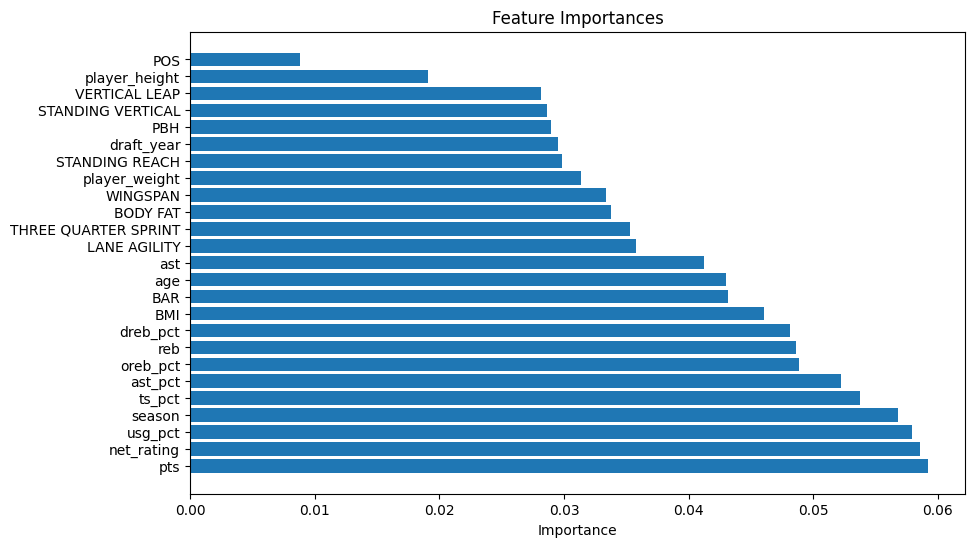

In [164]:
feature_names = player_with_combine.columns[:-1]
importances = rfc_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [197]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target (assuming last column is 'injuries')
X = player_with_combine.iloc[:, :-1].values  # Features (all columns except the last one)
y = player_with_combine.iloc[:, -1].values   # Target (injuries: 0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the fully connected neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5221 - loss: 0.7327 - val_accuracy: 0.5883 - val_loss: 0.6758 - learning_rate: 0.0010
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6032 - loss: 0.6628 - val_accuracy: 0.5883 - val_loss: 0.6743 - learning_rate: 0.0010
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6124 - loss: 0.6442 - val_accuracy: 0.5846 - val_loss: 0.6716 - learning_rate: 0.0010
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6513 - loss: 0.6243 - val_accuracy: 0.5921 - val_loss: 0.6656 - learning_rate: 0.0010
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6539 - loss: 0.6203 - val_accuracy: 0.5921 - val_loss: 0.6726 - learning_rate: 0.0010
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6507 - loss: 0.6195 - val_accuracy: 0.6053 - val_loss: 0.6699 - learning_rate: 0.0010
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6756 - loss: 0.5950 - val_ac